Iteration 1/10, Shortest path length: 36
Iteration 2/10, Shortest path length: 36
Iteration 3/10, Shortest path length: 36
Iteration 4/10, Shortest path length: 36
Iteration 5/10, Shortest path length: 36
Iteration 6/10, Shortest path length: 36
Iteration 7/10, Shortest path length: 36
Iteration 8/10, Shortest path length: 36
Iteration 9/10, Shortest path length: 36
Iteration 10/10, Shortest path length: 36

Shortest Path: [(3, 4), (4, 1), (1, 2), (2, 0), (0, 3)]
Shortest Path Length: 36


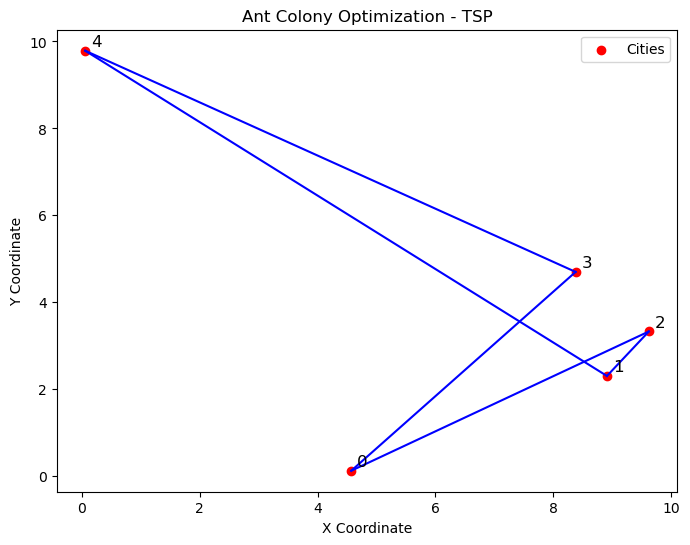

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

class AntColony:
    def __init__(self, n_cities, dist_matrix, n_ants=5, n_best=5, n_iterations=10, decay=1, alpha=1, beta=3):
        self.n_cities = n_cities
        self.dist_matrix = dist_matrix
        self.n_ants = n_ants
        self.n_best = n_best
        self.n_iterations = n_iterations
        self.decay = decay
        self.alpha = alpha
        self.beta = beta

        # Initialize pheromone matrix
        self.pheromone = np.ones((n_cities, n_cities)) / n_cities

    def run(self):
        shortest_path = None
        shortest_path_length = float('inf')

        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, shortest_path_length)

            # Find shortest path in this iteration
            for path, path_length in all_paths:
                if path_length < shortest_path_length:
                    shortest_path = path
                    shortest_path_length = path_length

            # Decay pheromone levels
            self.pheromone *= self.decay

            print(f"Iteration {i+1}/{self.n_iterations}, Shortest path length: {shortest_path_length}")

        return shortest_path, shortest_path_length

    def spread_pheronome(self, all_paths, shortest_path_length):
        # Update pheromone based on paths
        for path, path_length in all_paths:
            for move in path:
                self.pheromone[move] += 1.0 / path_length

    def gen_path(self, start_city):
        path = []
        visited = [False] * self.n_cities
        visited[start_city] = True
        current_city = start_city
        path_length = 0

        for _ in range(self.n_cities - 1):
            next_city = self.pick_next_city(current_city, visited)
            path.append((current_city, next_city))
            path_length += self.dist_matrix[current_city][next_city]
            visited[next_city] = True
            current_city = next_city

        # Return to the starting city
        path.append((current_city, start_city))
        path_length += self.dist_matrix[current_city][start_city]
        return path, path_length

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            start_city = random.randint(0, self.n_cities - 1)
            path, path_length = self.gen_path(start_city)
            all_paths.append((path, path_length))
        return sorted(all_paths, key=lambda x: x[1])[:self.n_best]

    def pick_next_city(self, current_city, visited):
        pheromone = self.pheromone[current_city]
        pheromone[visited] = 0  # Don't visit already visited cities
        pheromone = pheromone ** self.alpha

        heuristic = 1.0 / (self.dist_matrix[current_city] + 1e-10)
        heuristic[visited] = 0  # Don't consider visited cities
        heuristic = heuristic ** self.beta

        probabilities = pheromone * heuristic

        # If all probabilities are zero (i.e., no pheromone and heuristic), fall back to uniform distribution
        if probabilities.sum() == 0:
            probabilities = np.ones(self.n_cities) * (1 / (self.n_cities - np.sum(visited)))
            probabilities[visited] = 0  # Make sure already visited cities are excluded
        else:
            probabilities /= probabilities.sum()  # Normalize to get a probability distribution

        return np.random.choice(range(self.n_cities), p=probabilities)

# Sample Distance Matrix (for 5 cities)
dist_matrix = np.array([
    [0, 10, 2, 5, 1],
    [20, 0, 24, 80, 30],
    [2, 4, 0, 10, 3],
    [5, 80, 100, 0, 2],
    [70, 3, 30, 2, 0]
])

# Initialize Ant Colony optimizer
n_cities = dist_matrix.shape[0]
ant_colony = AntColony(n_cities=n_cities, dist_matrix=dist_matrix)

# Run the algorithm
shortest_path, shortest_path_length = ant_colony.run()

# Output the shortest path and its length
print("\nShortest Path:", shortest_path)
print("Shortest Path Length:", shortest_path_length)

# Plot the shortest path (optional)
plt.figure(figsize=(8, 6))
city_coords = np.random.rand(n_cities, 2) * 10  # Random city positions for visualization
city_x = city_coords[:, 0]
city_y = city_coords[:, 1]

plt.scatter(city_x, city_y, c='red', label="Cities")
for i, (x, y) in enumerate(zip(city_x, city_y)):
    plt.text(x + 0.1, y + 0.1, str(i), fontsize=12)

# Draw the shortest path
for i in range(len(shortest_path)):
    start, end = shortest_path[i]
    plt.plot([city_x[start], city_x[end]], [city_y[start], city_y[end]], 'b-')

plt.title('Ant Colony Optimization - TSP')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()